In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

## Data Input

In [2]:
dfo1hrun1 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun2 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun3 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun4 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

In [3]:
dfO1h = pd.concat([dfo1hrun1['Delays'], dfo1hrun1['Time-delay1'], dfo1hrun2['Time-delay2'], dfo1hrun3['Time-delay3'], 
                  dfo1hrun4['Time-delay4']], axis=1)
dfO1h = dfO1h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO1h['mean'] = dfO1h.iloc[:, 1:].mean(axis=1)
dfO1h['std'] = dfO1h.iloc[:, 1:].std(axis=1)

In [4]:
dfo2hrun1 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun2 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun3 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun4 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

In [5]:
dfO2h = pd.concat([dfo2hrun1['Delays'], dfo2hrun1['Time-delay1'], dfo2hrun2['Time-delay2'], dfo2hrun3['Time-delay3'], 
                  dfo2hrun4['Time-delay4']], axis=1)
dfO2h = dfO2h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO2h['mean'] = dfO2h.iloc[:, 1:].mean(axis=1)
dfO2h['std'] = dfO2h.iloc[:, 1:].std(axis=1)

In [6]:
dfo1run1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run2 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run3 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run3.txt', delimiter=' '
                       , dtype= np.float64)

In [7]:
dfO1 = pd.concat([dfo1run1['Delays'], dfo1run1['Time-delay1'], dfo1run2['Time-delay2'], dfo1run3['Time-delay3']], axis=1)
dfO1 = dfO1.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3"}, errors="raise")
dfO1['mean'] = dfO1.iloc[:, 1:].mean(axis=1)
dfO1['std'] = dfO1.iloc[:, 1:].std(axis=1)

In [8]:
dfo2run1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run2 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run3 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run3.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run4 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run4.txt', delimiter=' '
                       , dtype= np.float64)

In [9]:
dfO2 = pd.concat([dfo2run1['Delays'], dfo2run1['Time-delay1'], dfo2run2['Time-delay2'], dfo2run3['Time-delay3'], 
                 dfo2run4['Time-delay4']], axis=1)
dfO2 = dfO2.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                     "Time-delay4": "Run4"}, errors="raise")
dfO2['mean'] = dfO2.iloc[:, 1:].mean(axis=1)
dfO2['std'] = dfO2.iloc[:, 1:].std(axis=1)

In [10]:
labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']

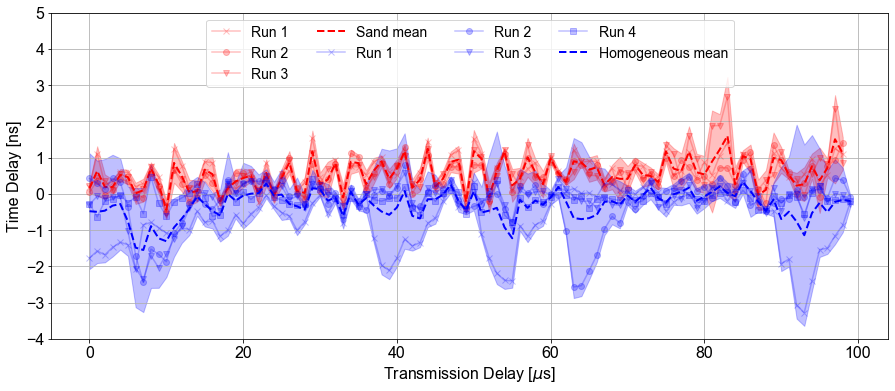

In [11]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1['Delays'], dfO1[r], p, label = l, alpha = 0.25, color = 'r') for r, p, l in zip(dfO1.keys()[1:4], ['-x', '-o', '-v', '-s', '-d', '-*'], 
                                                                                               labels)]
plt.plot(dfO1['Delays'], dfO1['mean'], '--', color = 'r', label = 'Sand mean', linewidth = 2)
plt.fill_between(dfO1.index, dfO1['mean'] - 2*dfO1['std'], dfO1['mean'] + 2*dfO1['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO1h['Delays'], dfO1h[r], p, label = l, alpha = 0.25, color = 'b') for r, p, l in zip(dfO1h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'],
                                                                                                 labels)]
plt.plot(dfO1h['Delays'], dfO1h['mean'], '--', color = 'b', label = 'Homogeneous mean', linewidth = 2)
plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
                alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4, 5)
plt.legend(fontsize=14, ncol = 4, loc ='upper center')
# plt.title('Orientation One')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Sand(thin)1/Thinsand1vsHomocementO1.pdf', dpi=300, 
#             bbox_inches='tight', format='pdf')
plt.show()

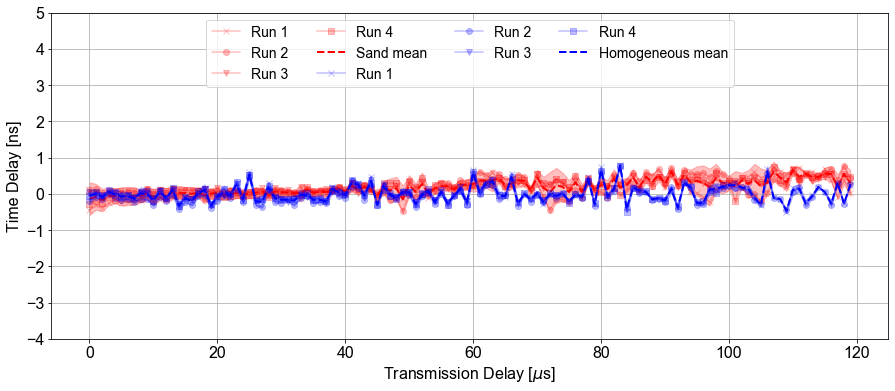

In [13]:
plt.figure(figsize=(15,6))
[plt.plot(dfO2['Delays'], dfO2[r], p, label = l, alpha = 0.25, color = 'r') for r, p, l in zip(dfO2.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'],
                                                                                               labels)]
plt.plot(dfO2['Delays'], dfO2['mean'], '--', color = 'r', label = 'Sand mean', linewidth = 2)
plt.fill_between(dfO2.index, dfO2['mean'] - 2*dfO2['std'], dfO2['mean'] + 2*dfO2['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO2h['Delays'], dfO2h[r], p, label = l, alpha = 0.25, color = 'b') for r, p, l in zip(dfO2h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'],
                                                                                                 labels)]
plt.plot(dfO2h['Delays'], dfO2h['mean'], '--', color = 'b', label = 'Homogeneous mean', linewidth = 2)
plt.fill_between(dfO2h.index, dfO2h['mean'] - 2*dfO2h['std'], dfO2h['mean'] + 2*dfO2h['std'],
                alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4.0, 5.0)
plt.legend(fontsize=14, ncol = 4, loc ='upper center')
# plt.title('Orientation Two')
plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Sand(thin)1/Thinsand1vsHomocementO2.pdf', dpi=300, 
            bbox_inches='tight', format='pdf')
plt.show()

In [15]:
np.average(dfO2['std'])

0.10818469987939859

## Signals

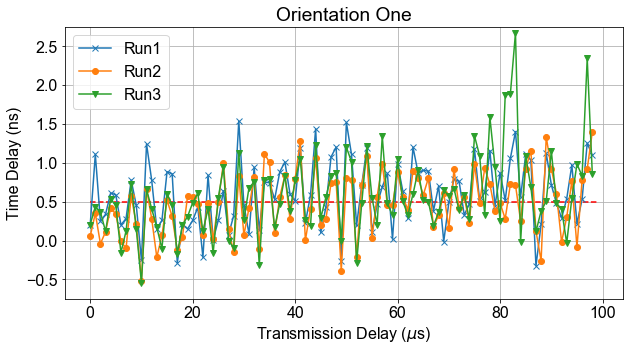

In [10]:
plt.figure(figsize=(10,5))
[plt.plot(dfO1['Delays'], dfO1[r], p, label = str(r)) for r, p in zip(dfO1.keys()[1:], ['-x', '-o', '-v'])]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation One')
plt.ylim(-0.75, 2.75)
plt.hlines(0.5, 0, 99, color = 'r', linestyles='--')
plt.show()

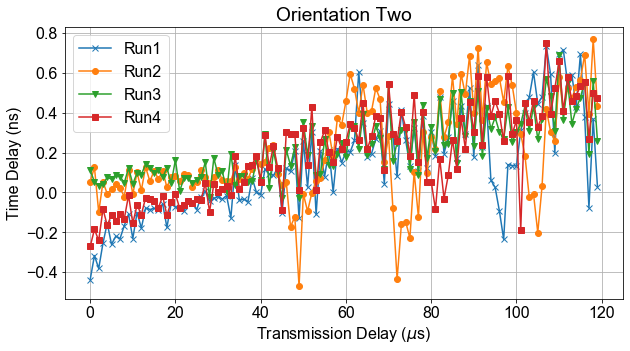

In [11]:
plt.figure(figsize=(10,5))
[plt.plot(dfO2['Delays'], dfO2[r], p, label=str(r)) for r, p in zip(dfO2.keys()[1:], ['-x', '-o', '-v', '-s'])]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation Two')
# plt.ylim(-0.75, 2.75)
plt.show()

In [17]:
print(dfO2['Run2'][50])

-0.007266226223551771


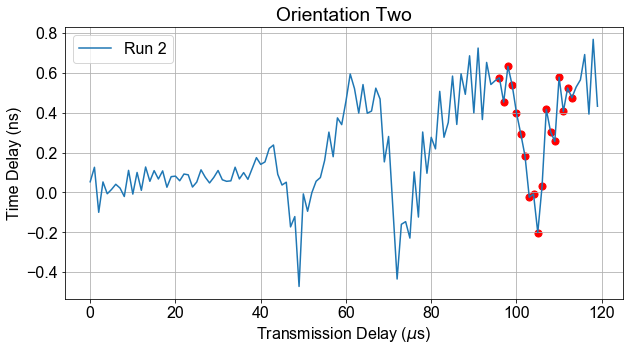

In [43]:
plt.figure(figsize=(10,5))
plt.plot(dfO2['Delays'], dfO2['Run2'], label='Run 2')
delays_to_scat = np.arange(96, 114, 1)
[plt.scatter(i, dfO2['Run2'][i], color='r', s=50) for i in delays_to_scat]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation Two')
# plt.ylim(-0.75, 2.75)
plt.show()

## FFTs

In [35]:
ffts_O1 = [fftpack.fft(dfO1[r].values) for r in dfO1.keys()[1:]]

# And the power (sig_fft is of complex dtype)
powers_O1 = [np.abs(fft)**2 for fft in ffts_O1]

# The corresponding frequencies
freq_O1 = [fftpack.fftfreq(len(dfO1[r]), d=1e-6) for r in dfO1.keys()[1:]]

In [219]:
ffts_O2 = [fftpack.fft(dfO2[r].values) for r in dfO2.keys()[1:]]

# And the power (sig_fft is of complex dtype)
powers_O2 = [np.abs(fft)**2 for fft in ffts_O2]

# The corresponding frequencies
freq_O2 = [fftpack.fftfreq(len(dfO2[r]), d=1e-6) for r in dfO2.keys()[1:]]

(0, 300)

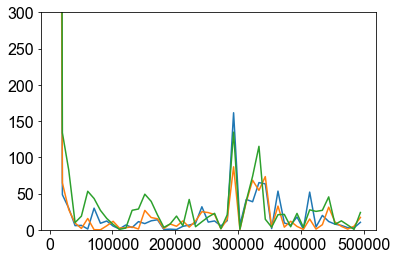

In [37]:
pos_masks_O1 = [np.where(f > 0) for f in freq_O1]
freqs_O1 = [f[pos_mask] for f, pos_mask in zip(freq_O1, pos_masks_O1)]
peak_freqs_O1 = [freqs[power[post_mask].argmax()] for freqs, power, post_mask in zip(freqs_O1, powers_O1, pos_masks_O1)]

# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
[plt.plot(freqs[:49], power[:49]) for freqs, power in zip(freqs_O1, powers_O1)] 
plt.ylim(0,300)

(0, 300)

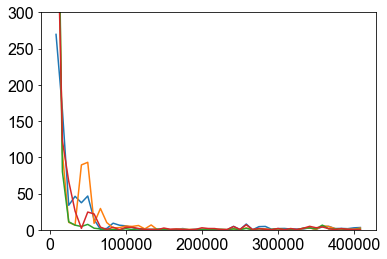

In [220]:
pos_masks_O2 = [np.where(f > 0) for f in freq_O2]
freqs_O2 = [f[pos_mask] for f, pos_mask in zip(freq_O2, pos_masks_O2)]
peak_freqs_O2 = [freqs[power[post_mask].argmax()] for freqs, power, post_mask in zip(freqs_O2, powers_O2, pos_masks_O2)]

# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
[plt.plot(freqs[:49], power[:49]) for freqs, power in zip(freqs_O2, powers_O2)] 
plt.ylim(0,300)

### Orientation 1

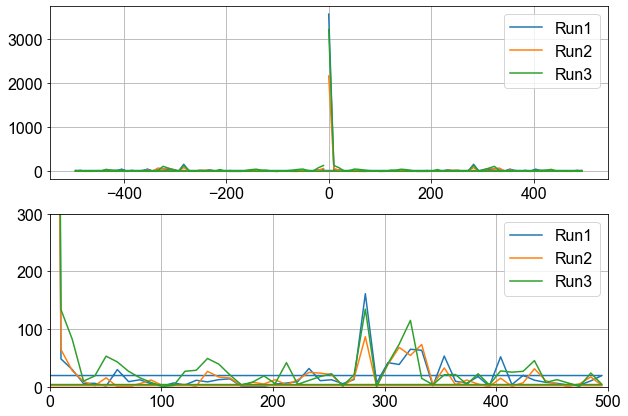

In [576]:
fig, ax  = plt.subplots(2, 1, figsize=(10, 7))
[ax[0].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O1, powers_O1, dfO1.keys()[1:])]
ax[0].legend()
ax[0].grid()
[ax[1].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O1, powers_O1, dfO1.keys()[1:])]
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(0, 300)
ax[1].set_xlim(0, 500)
plt.show()

### Orientation 2

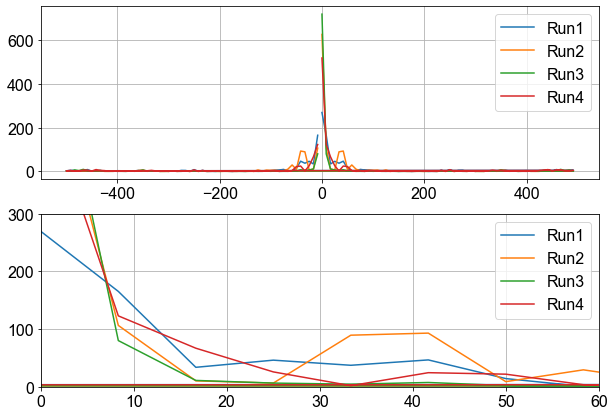

In [438]:
fig, ax  = plt.subplots(2, 1, figsize=(10, 7))
[ax[0].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O2, powers_O2, dfO2.keys()[1:])]
ax[0].legend()
ax[0].grid()
[ax[1].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O2, powers_O2, dfO2.keys()[1:])]
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(0, 300)
ax[1].set_xlim(0, 60)
plt.show()

In [176]:
def notch(f, fft, freqs):
    fft_fil = fft.copy()
    fft_fil[np.abs(freqs) > f] = 0
    fft_fil[np.abs(freqs) < f] = 0
    filtered_sig = fftpack.ifft(fft_fil)
    return filtered_sig

### Orientation 1; Run 1

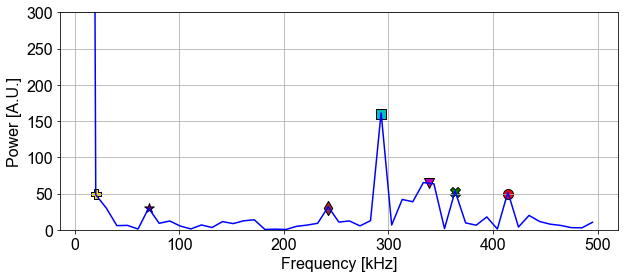

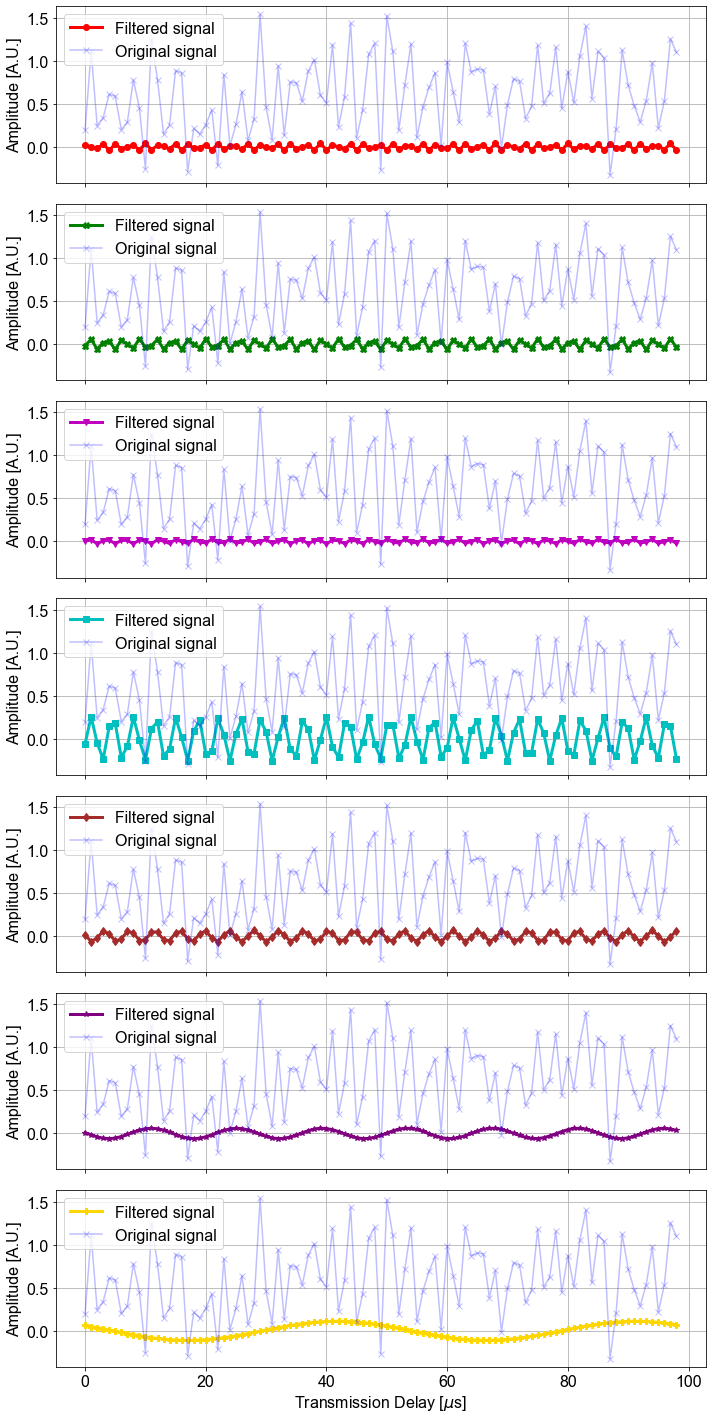

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[0][:49]/1000, powers_O1[0][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [414141.4141414142, 363636.3636363637, 339000, 292500, 242500, 70707.07070707071, 20202.020202020205]
freqs_to_filter = [414141.4141414142, 363636.3636363637, 343434.34343434346, 
                   peak_freqs_O1[0], 242424.24242424246, 70707.07070707071, 
                   20202.020202020205]
powers_to_scat = [50, 52, 65, 160, 30, 30, 50]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[0], freq_O1[0]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run1'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 1; Run 2

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[1][:49]/1000, powers_O1[1][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [444444.44444444, 343434.34343434, 323232.32323232, 292500, 242500, 151515.15151515155, 20202.020202020205]
freqs_to_filter = [freqs_O1[1][43], freqs_O1[1][33], freqs_O1[1][31], 
                   peak_freqs_O1[1], 242424.24242424246, 141414.14141414143, 
                   20202.020202020205]
powers_to_scat = [35, 75, 70, 85, 30, 30, 66]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[1], freq_O1[1]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run2'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 1; Run 3

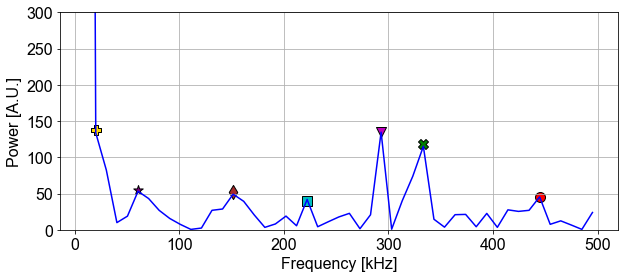

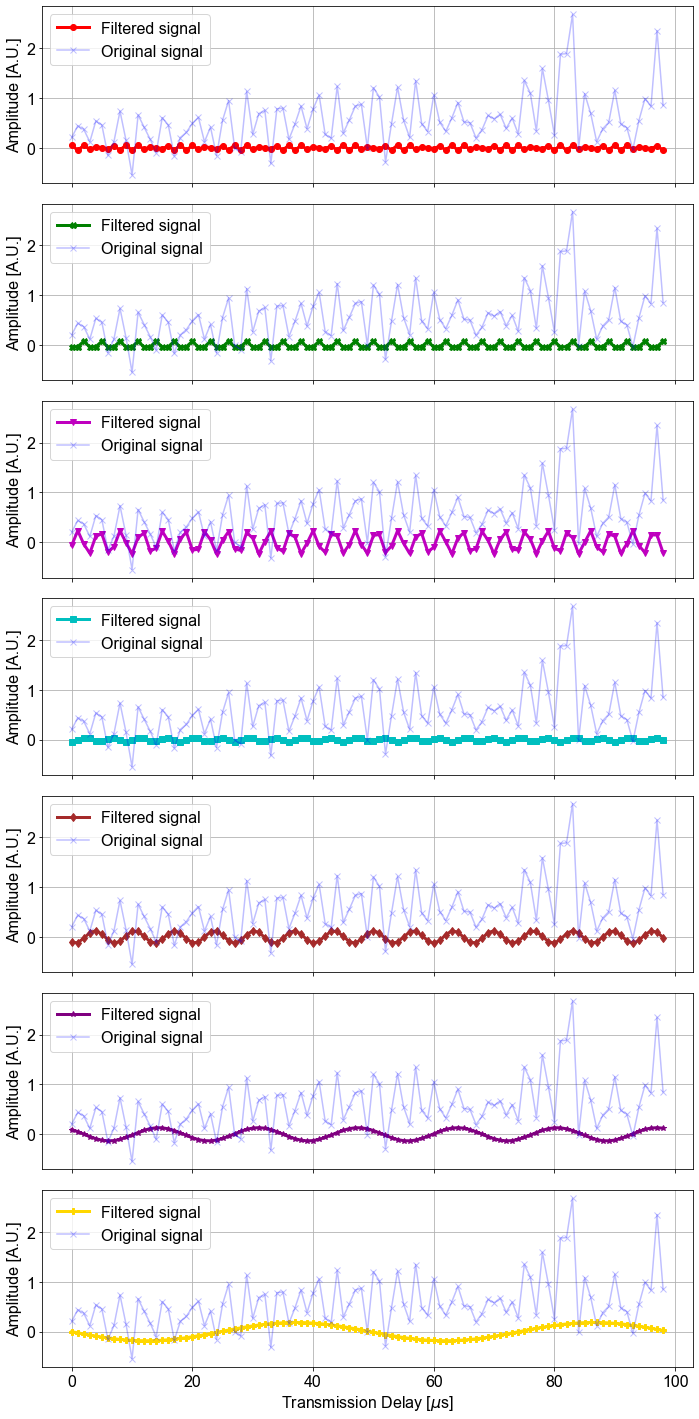

In [215]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[2][:49]/1000, powers_O1[2][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [444444.44444444, 333333.33333333, 292500, 222222.22222222, 151515.15151515, 60606.06060606, 20202.020202020205]
freqs_to_filter = [freqs_O1[2][43], freqs_O1[2][32], 
                   peak_freqs_O1[2], freqs_O1[2][21], freqs_O1[2][14], freqs_O1[2][5], 
                   freqs_O1[2][1]]
powers_to_scat = [45, 118, 135, 40, 52, 55, 138]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[2], freq_O1[2]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run3'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 2; Run 1

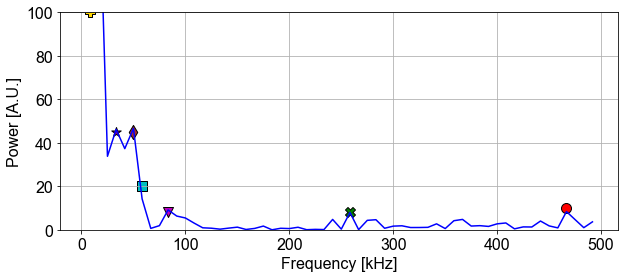

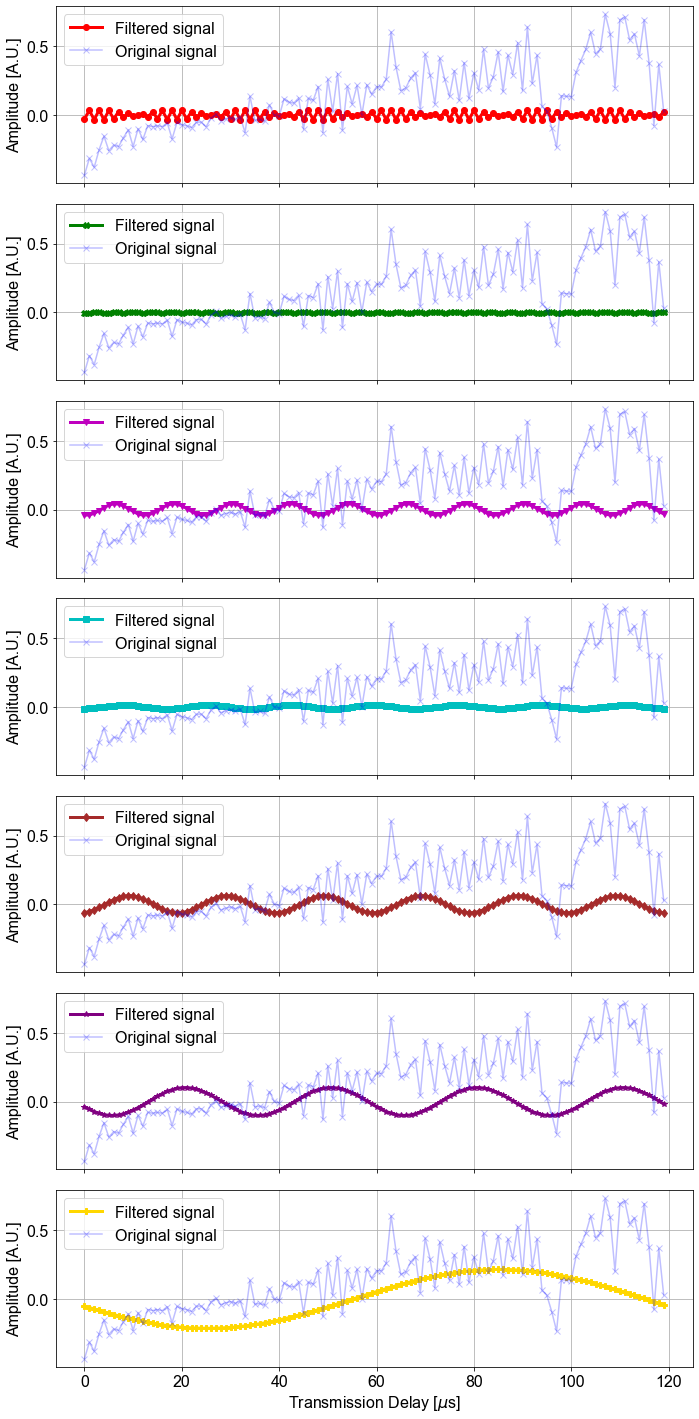

In [285]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[0]/1000, powers_O2[0][:59], color = 'b')
ax.set_ylim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [466666.66666667, 258333.33333333, 83333.33333333, 58333.33333333, 50000., 33333.33333333, 8333.33333333]
freqs_to_filter = [freqs_O2[0][55], freqs_O2[0][30], freqs_O2[0][9], 
                   freqs_O2[0][6], freqs_O2[0][5], freqs_O2[0][3], 
                   freqs_O2[0][0]]
powers_to_scat = [10, 8, 8, 20, 45, 45, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[0], freq_O2[0]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run1'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 2; Run 2

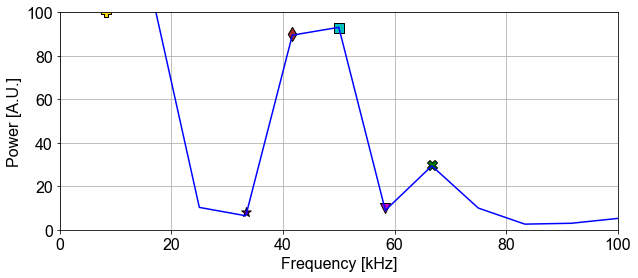

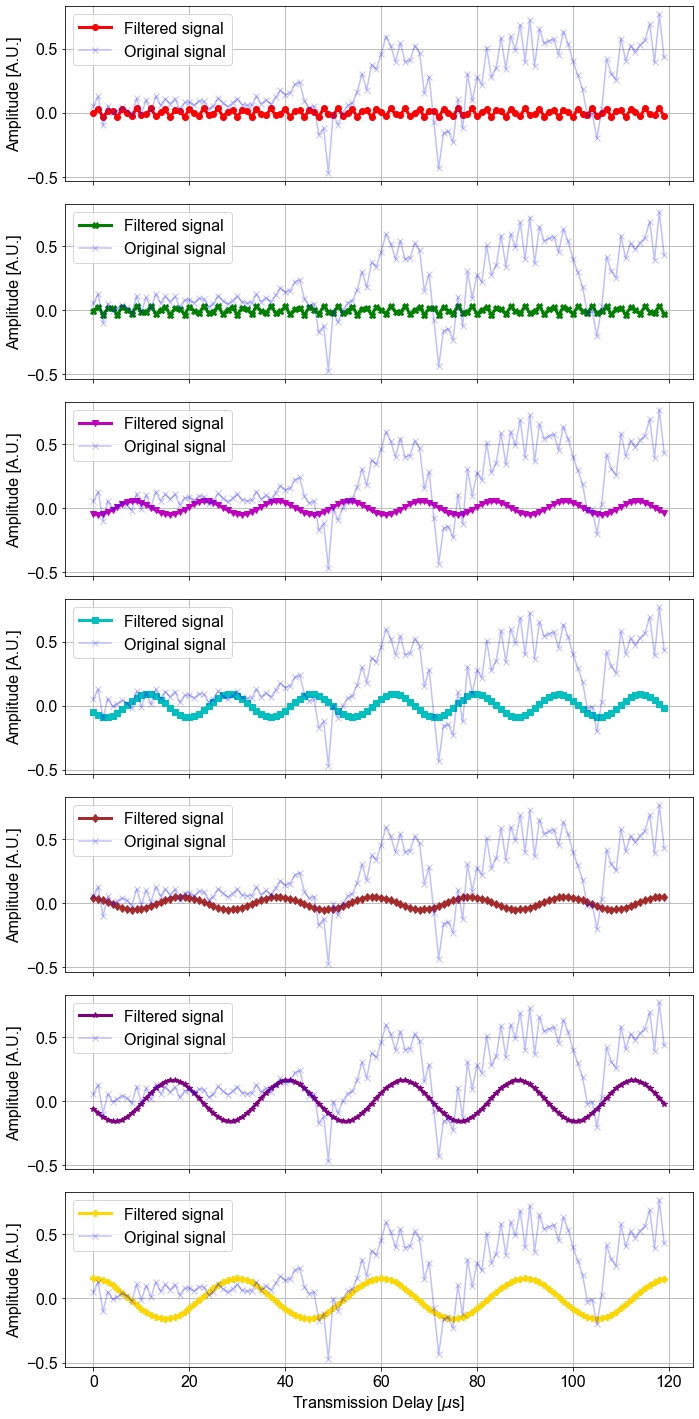

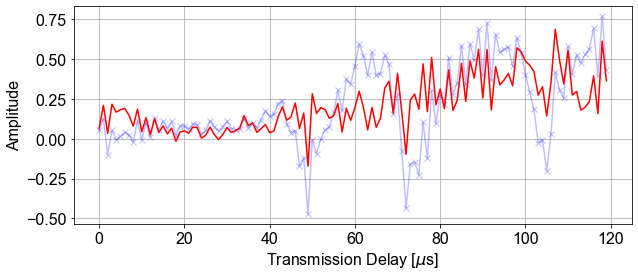

In [450]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[1]/1000, powers_O2[1][:59], color = 'b')
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [358333.33333333, 66666.66666667, 58333.33333333, 50000., 41666.66666667, 33333.33333333, 8333.33333333]
freqs_to_filter = [freqs_O2[1][42],freqs_O2[1][42], freqs_O2[1][7], freqs_O2[1][6], 
                   freqs_O2[1][5], freqs_O2[1][4], freqs_O2[1][3], 
                   freqs_O2[1][0]]
powers_to_scat = [6, 30, 10, 93, 90, 8, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[1], freq_O2[1]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run2'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(dfO2['Delays'],dfO2['Run2'], '-x', color = 'b', alpha = 0.25)
plt.plot(dfO2['Delays'], dfO2['Run2']
         -notch(freqs_O2[1][2],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][3],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][4],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][5],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][6],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][7],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][8],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][9],ffts_O2[1],freq_O2[1]),
         color = 'r')
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Orientation 2; Run 3

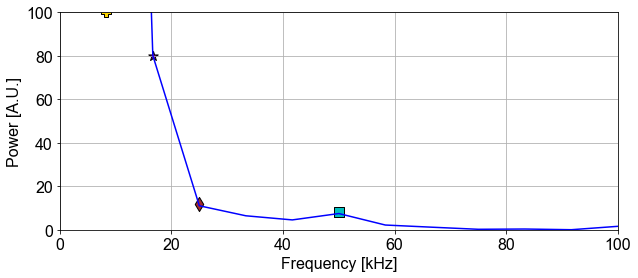

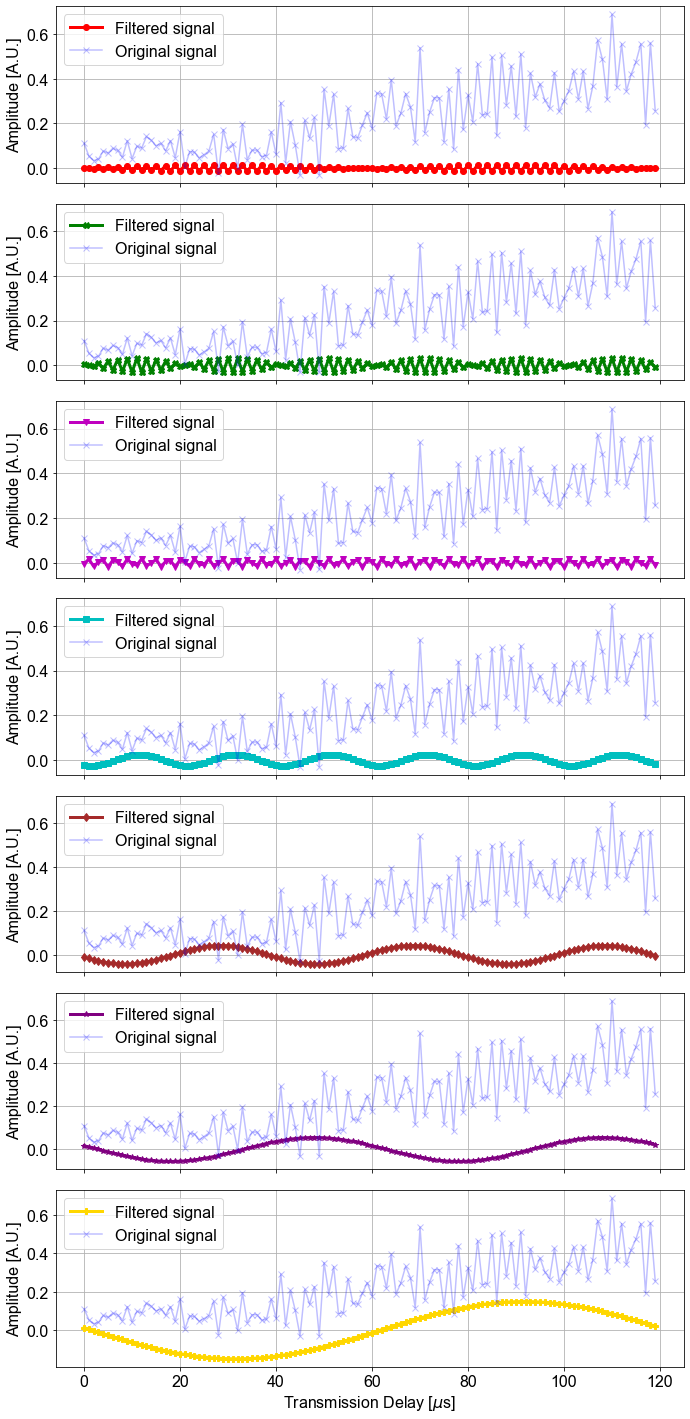

In [451]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[2]/1000, powers_O2[2][:59], color = 'b')
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [491666.66666667, 475000., 358333.33333333, 50000., 
                 25000., 16666.66666667, 8333.33333333]
freqs_to_filter = [freqs_O2[2][58], freqs_O2[2][56], freqs_O2[2][42], 
                   freqs_O2[2][5], freqs_O2[2][2], freqs_O2[2][1], 
                   freqs_O2[2][0]]
powers_to_scat = [8, 10, 6, 8, 12, 80, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[2], freq_O2[2]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run3'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 2; Run 4

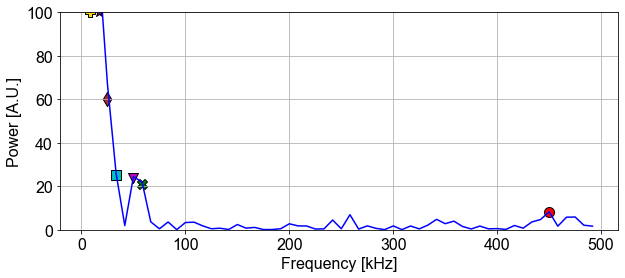

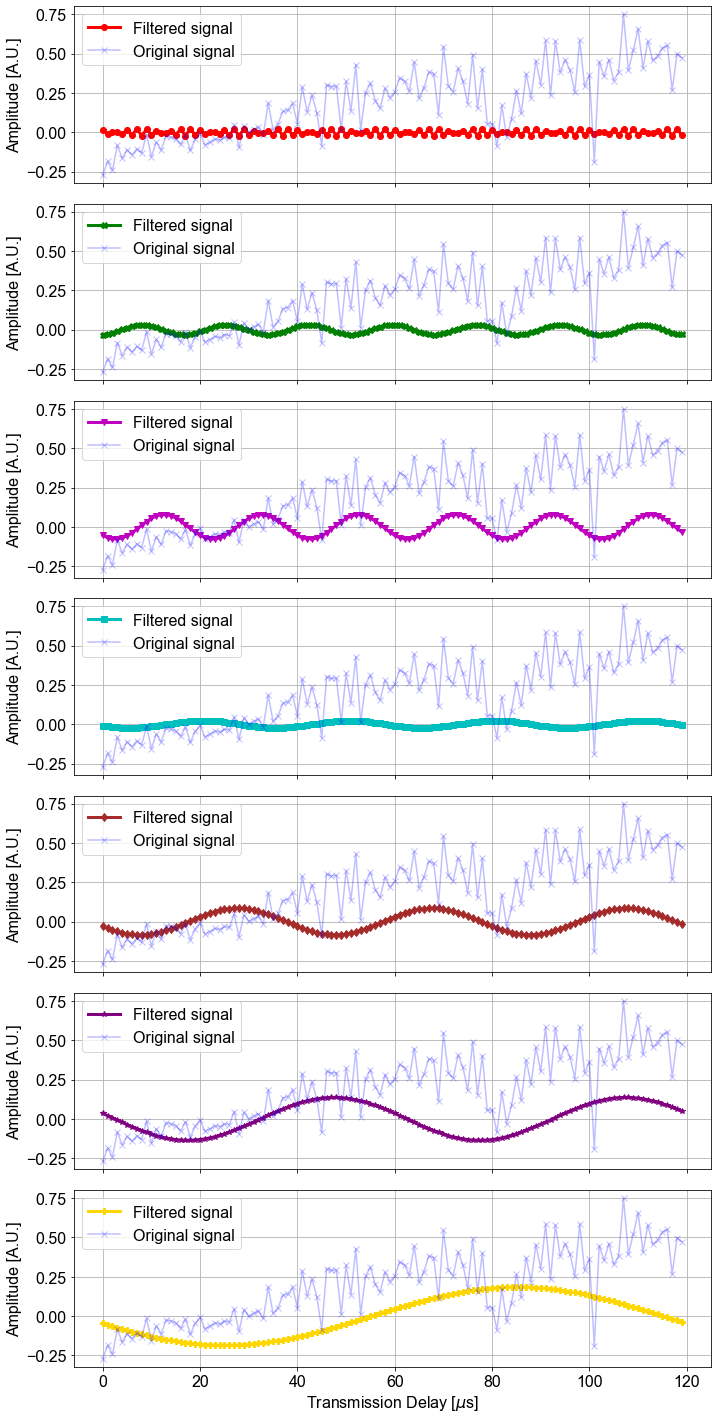

In [399]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[3]/1000, powers_O2[3][:59], color = 'b')
ax.set_ylim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [450000., 58333.33333333, 50000., 33333.33333333, 25000., 
                 16666.66666667, 8333.33333333]
freqs_to_filter = [freqs_O2[3][53], freqs_O2[3][6], freqs_O2[3][5], 
                   freqs_O2[3][3], freqs_O2[3][2], freqs_O2[3][1], 
                   freqs_O2[3][0]]
powers_to_scat = [8, 21, 24, 25, 60, 100, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[3], freq_O2[3]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run4'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

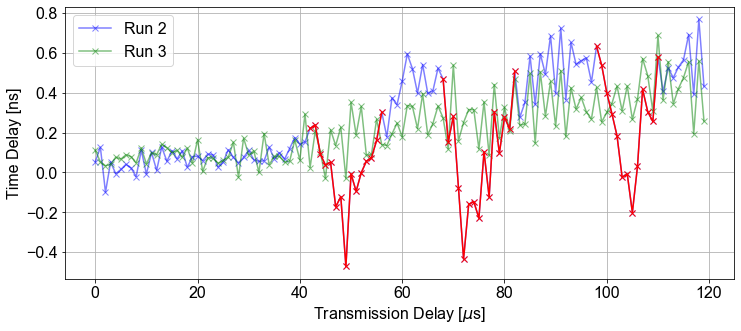

In [433]:
plt.figure(figsize=(12,5))
# [plt.plot(dfO2['Delays'], dfO2[r], '-'+s, label=r, color = 'b', alpha=0.25) 
#  for r, s in zip(dfO2.keys()[1:], ['x', 'v', 's', 'd'])]
plt.plot(dfO2['Delays'], dfO2['Run2'], '-x', label='Run 2', color = 'b', alpha=0.5)
plt.plot(dfO2['Delays'], dfO2['Run3'], '-x', label='Run 3', color = 'g', alpha=0.5)
plt.plot(dfO2['Delays'][42:57], dfO2['Run2'][42:57], '-x', color = 'r')
plt.plot(dfO2['Delays'][68:83], dfO2['Run2'][68:83], '-x', color = 'r')
plt.plot(dfO2['Delays'][98:111], dfO2['Run2'][98:111], '-x', color = 'r')
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
plt.legend()
plt.grid()
plt.show()

In [622]:
# sos = signal.butter(1, (5e-3,85e-3), 'bp', fs=2e6, output='sos')
sos = signal.butter(1, 10e-3, 'hp', fs=2e6, output='sos')
filtered = signal.sosfilt(sos, dfO2['Run2'])

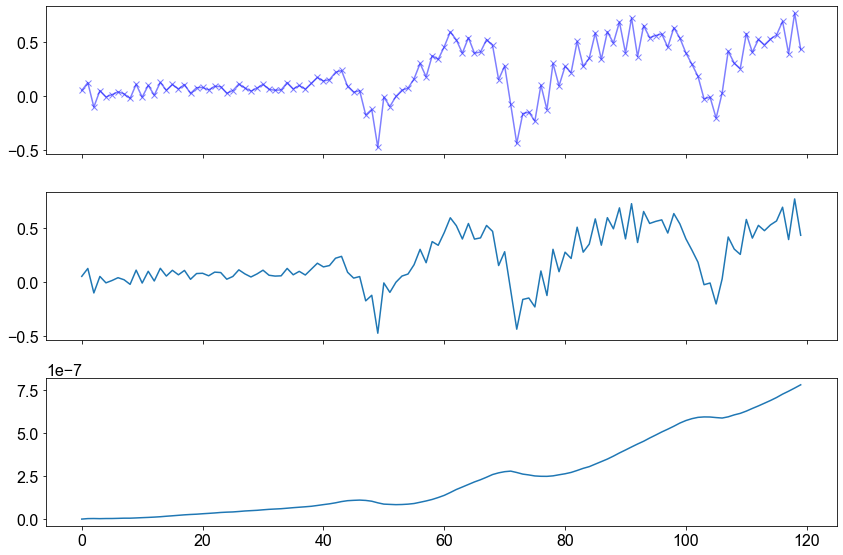

In [623]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax1.plot(dfO2['Delays'], dfO2['Run2'], '-x', label='Run 2', color = 'b', alpha=0.5)
ax2.plot(dfO2['Delays'], filtered)
ax3.plot(dfO2['Delays'], np.subtract(dfO2['Run2'], filtered))
plt.tight_layout()
plt.show()

In [581]:
sos = signal.butter(1, , 'low', fs=2e6, output='sos')
filtered = signal.sosfilt(sos, dfO1['Run1'])

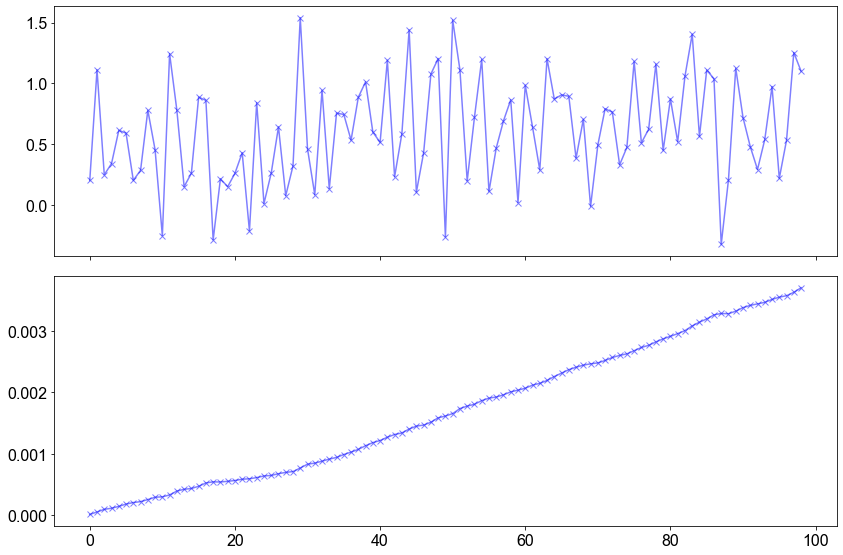

In [580]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(dfO1['Delays'], dfO1['Run1'], '-x', label='Run 1', color = 'b', alpha=0.5)
ax2.plot(dfO1['Delays'], filtered, '-x', label='Run 1', color = 'b', alpha=0.5)
plt.tight_layout()
plt.show()